<a href="https://colab.research.google.com/github/kkkk-8548/da_delivery/blob/main/delivery_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio proposto pelo Clube de Assinaturas

Food and Goods Deliveries in Brazil

O que é o Delivery Center
Com seus diversos hubs operacionais espalhados pelo Brasil, o Delivery Center é uma plataforma integra lojistas e marketplaces, criando um ecossistema saudável para vendas de good (produtos) e food (comidas) no varejo brasileiro.

Atualmente temos um cadastro (catálogo + cardápio) com mais de 900 mil itens, milhares de pedidos e entregas são operacionalizados diariamente com uma rede de milhares lojistas e entregadores parceiros espalhados por todas as regiões do país.

Tudo isso gera dados e mais dados a todo momento!

Diante disso, nosso negócio está cada vez data driven, ou seja, utilizando dados para tomar decisões e numa visão de futuro sabemos que utilizar os dados de forma inteligente pode ser o nosso grande diferencial no mercado.

Este é o nosso contexto e com ele lhe propomos um desafio desafio em que você possa aplicar seus conhecimentos técnicos objetivando resolver problemas cotidianos de uma equipe de dados.

Dados disponíveis
Observe na figura abaixo um modelo de dados no padrão floco de neve (snow flake).

Este modelo representa, de forma fictícia, dados de pedidos e entregas que foram processados pelo Delivery Center entre os meses de janeiro a abril de 2021.

Note que este é um modelo lógico e está fisicamente disponível em datasets no formato csv, ou seja, cada dataset fisicamente disponível representa uma tabela neste esquema abaixo. Aqui estão os datasets.

Os dados não possuem a completude de toda operação do Delivery Center e algumas informações foram anonimizadas devido ao nosso tratamento com a Lei Geral de Proteção de Dados (LGPD).

Fonte: Kaggle


Descrição dos datasets:

Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

* deliveries: Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.
* drivers: Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.
* hubs: Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.
* orders: Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.
* payments: Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.
* stores: Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

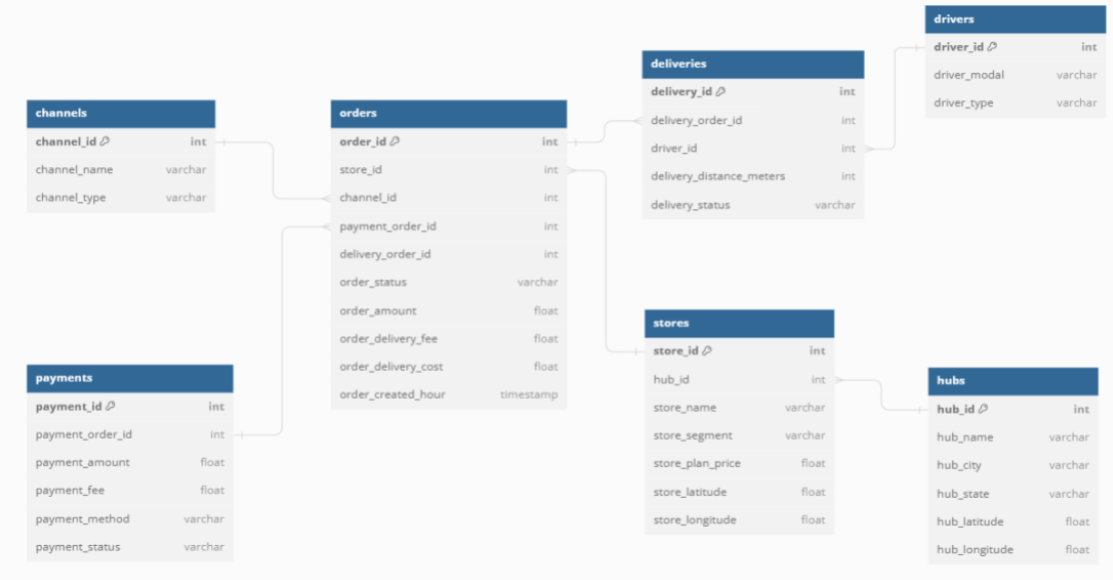

Ao time de Marketing:
Numa ação de marketing, para atrair mais entregadores, vamos dar uma bonificação para os 20 entregadores que possuem maior distância percorrida ao todo. A bonificação vai variar de acordo com o tipo de profissional que ele é e o modelo que ele usa para se locomover (moto, bike, etc).

Levante essas informações:
  - top 20 entregadores com maior distância percorrida
  - por modelo de locomoção

Ao time de Pricing:
Além disso, o time de Pricing precisa ajustar os valores pagos aos entregadores. Para isso, eles precisam da distribuição da distância média percorrida pelos motoqueiros separada por estado, já que cada região terá seu preço.

Levante as informações:
  - Separar distância média percorrida pelos entregadores por estado

  

Ao CFO:
Por fim, o CFO precisa de alguns indicadores de receita para apresentar para a diretoria executiva. Dentre esses indicadores, vocês precisarão levantar (1) a receita média e total separada por tipo (Food x Good), (2) A receita média e total por estado. Ou seja, são 4 tabelas ao todo.

Levante as informações:
  - Receita média por tipo (Food x Good)
  - Receita total por tipo (Food x Good)
  - Receita média por estado
  - Receita média por estado


Desafio: Se a empresa tem um gasto fixo de 5 reais por entrega, recebe 15% do valor de cada entrega como receita e, do total do lucro, distribui 20% em forma de bônus para os 2 mil funcionários, quanto cada um irá receber no período contido no dataset?

In [ ]:
import sqlite3
import pandas as pd
from google.colab import drive

In [ ]:
from pathlib import Path
Path('delivery_data.db').touch()

In [ ]:
conn = sqlite3.connect('delivery_data.db')
c = conn.cursor()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# load the data into a Pandas DataFrame
deliveries = pd.read_csv('deliveries.csv', encoding = "iso-8859-1")
channels = pd.read_csv('channels.csv', encoding = "iso-8859-1")
drivers = pd.read_csv('drivers.csv', encoding = "iso-8859-1")
hubs = pd.read_csv('hubs.csv', encoding = "iso-8859-1")
orders = pd.read_csv('orders.csv', encoding = "iso-8859-1")
payments = pd.read_csv('payments.csv', encoding = "iso-8859-1")
stores = pd.read_csv('stores.csv', encoding = "iso-8859-1")

In [ ]:
# write the data to a sqlite table
deliveries.to_sql('deliveries', conn, if_exists='append', index = False)
channels.to_sql('channels', conn, if_exists='append', index = False)
drivers.to_sql('drivers', conn, if_exists='append', index = False)
hubs.to_sql('hubs', conn, if_exists='append', index = False)
orders.to_sql('orders', conn, if_exists='append', index = False)
payments.to_sql('payments', conn, if_exists='append', index = False)
stores.to_sql('stores', conn, if_exists='append', index = False)

951

In [ ]:
#Marketing: top 20 entregadores com maior distância percorrida e por modelo de locomoção
pd.read_sql('''
        SELECT
              t1.driver_id,
              t2.driver_modal,
              SUM(t1.delivery_distance_meters) AS tot_dist_percorrida
        FROM deliveries AS t1
        LEFT JOIN drivers AS t2
          ON t1.driver_id = t2.driver_id
        WHERE t1.delivery_status = "DELIVERED" AND t1.driver_id IS NOT NULL
        GROUP BY 1,2
        ORDER BY SUM(t1.delivery_distance_meters) DESC
        LIMIT 20
'''
,conn)

,driver_id,driver_modal,tot_dist_percorrida
0,26223.0,MOTOBOY,241610044.0
1,25651.0,MOTOBOY,129823444.0
2,15898.0,MOTOBOY,32837356.0
3,17749.0,MOTOBOY,32240192.0
4,731.0,MOTOBOY,28797904.0
5,31023.0,MOTOBOY,24300892.0
6,42146.0,MOTOBOY,19382796.0
7,11063.0,MOTOBOY,19316248.0
8,14136.0,MOTOBOY,17280492.0
9,464.0,MOTOBOY,16988384.0


In [ ]:
#Pricing: distância média percorrida pelos entregadores por estado
pd.read_sql('''
        SELECT
              t4.hub_state,
               AVG(t2.delivery_distance_meters) AS avg_dist_percorrida
        FROM orders AS t1
        LEFT JOIN deliveries AS t2
          ON t2.delivery_order_id = t1.delivery_order_id
        LEFT JOIN stores AS t3
          ON t1.store_id = t3.store_id
        LEFT JOIN hubs AS t4
          ON t3.hub_id = t4.hub_id
        WHERE t2.delivery_status = "DELIVERED"
        GROUP BY 1

'''
,conn)

,hub_state,avg_dist_percorrida
0,PR,15036.811843
1,RJ,4310.886174
2,RS,4122.787943
3,SP,14623.745062


In [ ]:
#CFO:Receita média e total por tipo (Food x Good)
pd.read_sql('''

        SELECT
              t3.store_segment,
              SUM(t2.payment_amount) AS total_revenue,
              AVG(t2.payment_amount) AS average_revenue

        FROM orders AS t1
        LEFT JOIN payments AS t2
          ON t1.payment_order_id = t2.payment_order_id
        LEFT JOIN stores AS t3
          ON t1.store_id = t3.store_id
        WHERE t2.payment_status = "PAID"
        GROUP BY 1
'''
,conn)


,store_segment,total_revenue,average_revenue
0,FOOD,2.241369e+08,78.364487
1,GOOD,7.429701e+07,216.695280


In [ ]:
#CFO:Receita média e total por estado (Food x Good)
pd.read_sql('''

        SELECT
              t4.hub_state,
              SUM(t2.payment_amount) AS total_revenue,
              AVG(t2.payment_amount) AS average_revenue

        FROM orders AS t1
        LEFT JOIN payments AS t2
          ON t1.payment_order_id = t2.payment_order_id
        LEFT JOIN stores AS t3
          ON t1.store_id = t3.store_id
        LEFT JOIN hubs AS t4
          ON t3.hub_id = t4.hub_id
        WHERE t2.payment_status = "PAID"
        GROUP BY 1
'''
,conn)


,hub_state,total_revenue,average_revenue
0,PR,3.161893e+07,58.841234
1,RJ,2.026344e+08,85.918550
2,RS,4.789095e+07,74.427707
3,SP,3.147234e+08,109.780906


In [ ]:
#CFO: Quanto cada um dos 2 mil funcionários irá receber de bonus se a empresa tem um gasto fixo de 5 reais por entrega,
    #recebe 15% do valor de cada entrega como receita e do total do lucro, distribui 20% em forma de bônus para os 2 mil funcionários.

pd.read_sql('''
        WITH tab AS (
        SELECT
              t3.driver_id,
              t2.payment_amount,
              (t2.payment_amount - 5) * 0.15 AS profit,
              ((t2.payment_amount - 5) * 0.15)* 0.20 AS bonus
        FROM orders AS t1
        LEFT JOIN payments AS t2
          ON t1.payment_order_id = t2.payment_order_id
        LEFT JOIN deliveries AS t3
          ON t3.delivery_order_id = t1.delivery_order_id
        WHERE driver_id IS NOT NULL
        GROUP BY 1,2
        )
        SELECT
              driver_id,
              SUM(bonus) AS bonus
        FROM tab
        GROUP BY 1
'''
,conn)


,driver_id,bonus
0,133.0,49.1460
1,138.0,284.5164
2,140.0,1318.8246
3,143.0,8.4510
4,148.0,1083.3747
...,...,...
4578,66243.0,21.2145
4579,66260.0,4.3440
4580,66271.0,5.7360
4581,66457.0,14.6529


In [ ]:
#quantos funcionários tem a empresa?

pd.read_sql('''

        SELECT COUNT(DISTINCT driver_id)

        FROM drivers

'''
,conn)


,COUNT(DISTINCT driver_id)
0,4824
